# Sentiment analysis

Sentiment analysis is the process of using natural language processing, text analysis, and statistics to analyze customer sentiment. The best businesses understand the sentiment of their customers—what people are saying, how they’re saying it, and what they mean. Customer sentiment can be found in tweets, comments, reviews, or other places where people mention your brand. Sentiment Analysis is the domain of understanding these emotions with software, and it’s a must-understand for developers and business leaders in a modern workplace.

Sentiment analysis technique  detects the underlying sentiment in a piece of text from a customer.

It is the process of classifying text as either positive, negative, or neutral. Machine learning techniques are used to evaluate a piece of text and determine the sentiment behind it.

## Uses of sentiment analysis

### Brand monitoring
One of the most well documented uses of sentiment analysis is to get a full 360 view of how your brand, product, or company is viewed by your customers and stakeholders. Widely available media, like product reviews and social, can reveal key insights about what your business is doing right or wrong.

### Customer service
Customer service agents often use sentiment or intent analysis to automatically sort incoming user email into “urgent” or “not urgent” buckets based on the sentiment of the email, proactively identifying frustrated users. The agent then directs their time toward resolving the users with the most urgent needs first

### Sentiment analysis for market research and analysis
Sentiment analysis is used in business intelligence to understand the subjective reasons why consumers are or are not responding to something (e.x. why are consumers buying a product? What do they think of the user experience? Did customer service support meet their expectations?).

Sentiment analysis is essential for businesses to gauge customer response.
Picture this: Your company has just released a new product that is being advertised on a number of different channels.
In order to gauge customer’s response to this product, sentiment analysis can be performed.
Customers usually talk about products on social media and customer feedback forums. This data can be collected and analyzed to gauge overall customer response.

## Dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Dataframe contains some product, user and review information.The data that we will be using most for this analysis is “Summary”, “Text”, and “Score.”

## Data analysis

Now, we will take a look at the variable “Score” to see if majority of the customer ratings are positive or negative.

Text(0.5, 1.0, 'Product score')

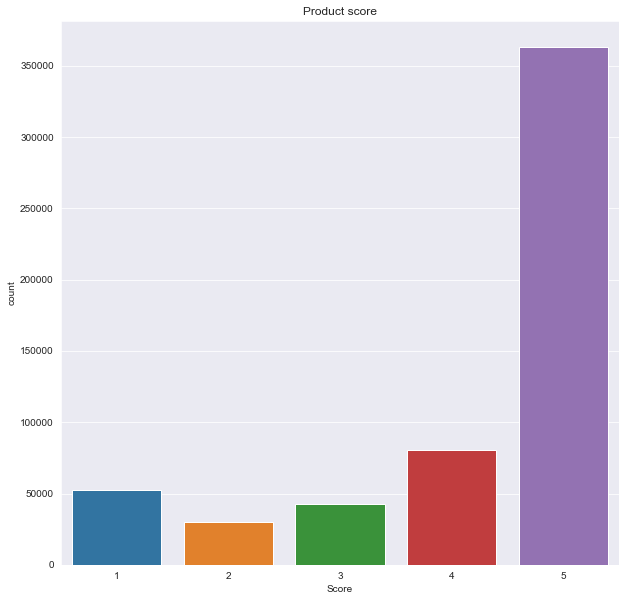

In [3]:
# Score count
plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(df['Score'])
plt.title("Product score")

Most of the customer rating is positive. This leads me to believe that most reviews will be pretty positive too

In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
from wordcloud import WordCloud,STOPWORDS
#create stop words 
stopwords = set(STOPWORDS)
stopwords.update(['br'])

In [7]:
textt = " ".join(review for review in df.Text)

In [8]:
WC = WordCloud(stopwords=stopwords,background_color="white").generate(textt)

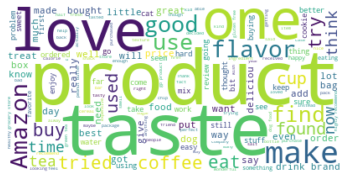

In [9]:
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

Some popular words that can be observed here include “taste,” “product,” “love,” and “Amazon.” These words are mostly positive, also indicating that most reviews in the dataset express a positive sentiment

## Classifying tweets
In this step, we will classify reviews into “positive” and “negative,” so we can use this as training data for our sentiment classification model.
Positive reviews will be classified as +1, and negative reviews will be classified as -1.
We will classify all reviews with ‘Score’ > 3 as +1, indicating that they are positive.
All reviews with ‘Score’ < 3 will be classified as -1. Reviews with ‘Score’ = 3 will be dropped, because they are neutral. Our model will only classify positive and negative reviews.

In [10]:
df = df[df['Score'] != 3] # dropping rows with score equals 3.

In [11]:
df['sentiment'] = df['Score']

In [12]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,5


In [13]:
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

In [14]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


### Building wordcloud for each
Now that we have classified tweets into positive and negative, let’s build wordclouds for each!
First, we will create two data frames — one with all the positive reviews, and another with all the negative reviews.

### Separate dataframe into positive and negative rating

### Positive wordcloud

In [15]:
df_positive = df[df['sentiment'] == +1]

In [16]:
df_positive .head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1


In [17]:
textt = " ".join(review for review in df_positive.Summary)

In [18]:
WC2 = WordCloud(stopwords=stopwords,background_color="white").generate(textt)

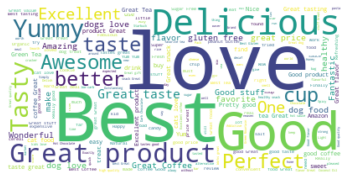

In [19]:
plt.imshow(WC2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

### Negative wordcloud

In [20]:
df_negative = df[df['sentiment']== -1]
df_negative.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,-1
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,-1
16,17,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,0,0,2,1348099200,poor taste,I love eating them and they are good for watch...,-1
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",-1


In [21]:
df_negative['Summary']= df_negative['Summary'].apply(str)
textt = " ".join(review for review in df_negative.Summary)

<ipython-input-21-1c87c5191ca4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Summary']= df_negative['Summary'].apply(str)


In [22]:
stopwords.update(['good', 'great'])
WC3 = WordCloud(stopwords=stopwords,background_color="white").generate(textt)

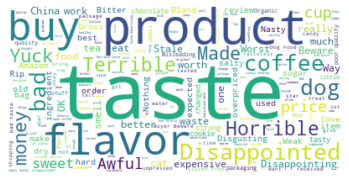

In [23]:
plt.imshow(WC3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

As seen above, the positive sentiment word cloud was full of positive words, such as “love,” “best,” and “delicious.”
The negative sentiment word cloud was filled with mostly negative words, such as “disappointed,” and “Horrible”

Looking at the distribution of reviews with sentiment across the dataset:

In [24]:
df['sentiment'] = df['sentiment'].replace({-1 : 'negative'})
df['sentiment'] = df['sentiment'].replace({1 : 'positive'})

Text(0.5, 1.0, 'sentiment review')

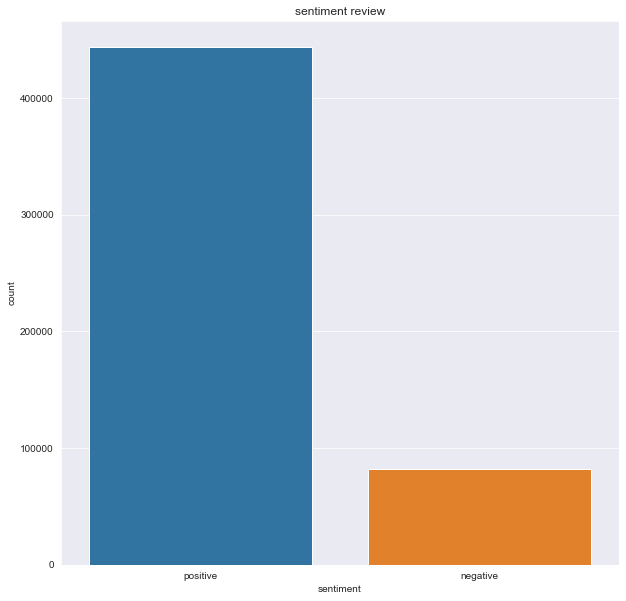

In [25]:
# Score count
plt.figure(figsize = (10,10)) 
sns.set_style("darkgrid")
sns.countplot(df['sentiment'])
plt.title("sentiment review")

WE have more positive reviews compared to negative reviews

## Building the model

In [26]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


In [27]:
#shape of dataframe
df.shape

(525814, 11)

In [28]:
df.describe() # statistics

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,525814.000000,525814.000000,525814.000000,525814.000000,5.258140e+05
mean,284599.060038,1.747293,2.209544,4.279148,1.295943e+09
std,163984.038077,7.575819,8.195329,1.316725,4.828129e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142730.250000,0.000000,0.000000,4.000000,1.270598e+09
50%,284989.500000,0.000000,1.000000,5.000000,1.310861e+09
75%,426446.750000,2.000000,2.000000,5.000000,1.332634e+09
max,568454.000000,866.000000,878.000000,5.000000,1.351210e+09


In [29]:
df.info() # datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525814 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      525814 non-null  int64 
 1   ProductId               525814 non-null  object
 2   UserId                  525814 non-null  object
 3   ProfileName             525798 non-null  object
 4   HelpfulnessNumerator    525814 non-null  int64 
 5   HelpfulnessDenominator  525814 non-null  int64 
 6   Score                   525814 non-null  int64 
 7   Time                    525814 non-null  int64 
 8   Summary                 525789 non-null  object
 9   Text                    525814 non-null  object
 10  sentiment               525814 non-null  object
dtypes: int64(5), object(6)
memory usage: 68.1+ MB


In [30]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   25
Text                       0
sentiment                  0
dtype: int64

ProfileName has 16 missing values and Summary has 25 missing values

### Data cleaning

In [31]:
# drop rows with missing values
df = df.dropna()

In [32]:
df['Summary']= df['Summary'].str.replace('[^\w\s]','') #remove punctuations

In [33]:
df['Text']= df['Text'].str.replace('[^\w\s]','') #remove punctuations

In [34]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,Delight says it all,This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price There was a wide...,positive


In [35]:
df_new = df[['Summary', 'sentiment']]

In [36]:
df_new.head()

,Summary,sentiment
0,Good Quality Dog Food,positive
1,Not as Advertised,negative
2,Delight says it all,positive
3,Cough Medicine,negative
4,Great taffy,positive


splitting dataframe into train and test

In [37]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_new, test_size = 0.2, random_state = 0)

In [38]:
train_df.shape, test_df.shape

((420618, 2), (105155, 2))

In [39]:
X_train = train_df['Summary']
X_test = test_df['Summary']
y_train = train_df['sentiment']
y_test = test_df['sentiment']

### Create a bag of words
Use a count vectorizer from the Scikit-learn library to transform the text in our data frame into a bag of words model, which will contain a sparse matrix of integers. The number of occurrences of each word will be counted and printed.

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

10278

In [41]:
X_train_vectorized = vect.transform(X_train)

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga')
model.fit(X_train_vectorized, y_train)

LogisticRegression(solver='saga')

In [43]:
predictions = model.predict(vect.transform(X_test))

## Confusion matrix

In [44]:
from sklearn.metrics import confusion_matrix,classification_report
cm= confusion_matrix(predictions,y_test)

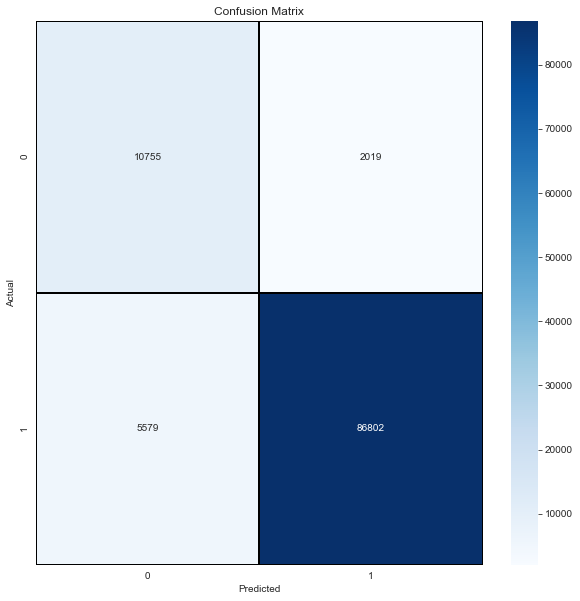

In [45]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()  

In [47]:
clr = classification_report(y_test, predictions, target_names=["Negative", "Positive"])
print(clr)

              precision    recall  f1-score   support

    Negative       0.84      0.66      0.74     16334
    Positive       0.94      0.98      0.96     88821

    accuracy                           0.93    105155
   macro avg       0.89      0.82      0.85    105155
weighted avg       0.92      0.93      0.92    105155

